<a href="https://colab.research.google.com/github/mks2607/Data_Scientist/blob/mks2607/Online_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

data = pd.read_csv('/content/online_sales_dataset.csv') #Импорт данных

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [5]:
data['WarehouseLocation'] = data['WarehouseLocation'].fillna('Other world')
data['ShippingCost'] = data['ShippingCost'].fillna(0)
data['CustomerID'] = data['CustomerID'].fillna(0)

In [6]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,0.0,United Kingdom,1.501433,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Other world,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         49782 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       49782 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  49782 non-null  object 
 16  OrderPriority      497

In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['InvoiceDate'] = data['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [9]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01,-68.11,0.0,United Kingdom,1.501433,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Other world,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [10]:
data.groupby('InvoiceDate').sum('Discount')

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
InvoiceDate,,,,,,
2020-01-01,11148427,650,1215.87,1081165.0,7.081433,354.43
2020-01-02,11178753,588,1185.80,1301783.0,4.520000,434.42
2020-01-03,13019034,594,1083.56,1247226.0,5.470000,425.34
2020-01-04,13683589,579,1120.17,1425128.0,6.210000,422.54
2020-01-05,12483105,579,1046.13,1490713.0,4.790000,407.95
...,...,...,...,...,...,...
2025-09-01,15106457,610,1098.59,914368.0,8.955694,397.54
2025-09-02,13859817,567,960.25,1149979.0,7.530665,382.09
2025-09-03,11928964,392,857.66,1203594.0,6.409869,311.21


In [11]:
data.groupby('InvoiceDate')['Discount'].sum('Discount')

,Discount
InvoiceDate,
2020-01-01,7.081433
2020-01-02,4.520000
2020-01-03,5.470000
2020-01-04,6.210000
2020-01-05,4.790000
...,...
2025-09-01,8.955694
2025-09-02,7.530665
2025-09-03,6.409869


In [12]:
data.groupby('InvoiceDate').agg({'Discount':'sum', 'UnitPrice': 'max','ShippingCost': 'min'}).reset_index()

,InvoiceDate,Discount,UnitPrice,ShippingCost
0,2020-01-01,7.081433,98.19,0.00
1,2020-01-02,4.520000,99.31,6.14
2,2020-01-03,5.470000,99.17,6.60
3,2020-01-04,6.210000,94.77,5.92
4,2020-01-05,4.790000,88.14,6.64
...,...,...,...,...
2070,2025-09-01,8.955694,96.99,0.00
2071,2025-09-02,7.530665,98.11,0.00
2072,2025-09-03,6.409869,97.76,0.00
2073,2025-09-04,6.970000,95.02,0.00


In [13]:
data.groupby(['Description','StockCode']).first().reset_index().head(3) #как бы группирует, но столбцы не суммирует и поэтому все значения остаются неизменными.

,Description,StockCode,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,Backpack,SKU_1000,164820,21,2020-01-01,1.07,20566.0,Sweden,0.49,Bank Transfer,15.09,Accessories,Online,Not Returned,FedEx,London,Medium
1,Backpack,SKU_1001,721234,35,2022-06-24,78.85,58682.0,Spain,0.38,paypall,8.33,Electronics,In-store,Returned,Royal Mail,Amsterdam,High
2,Backpack,SKU_1002,580671,18,2020-01-12,63.78,17819.0,France,0.20,paypall,13.67,Apparel,Online,Not Returned,UPS,London,Low


In [14]:
data.groupby('PaymentMethod')['Discount'].sum()

,Discount
PaymentMethod,
Bank Transfer,4584.845052
Credit Card,4540.108148
paypall,4602.317209


In [15]:
data.groupby('PaymentMethod')['UnitPrice'].sum()

,UnitPrice
PaymentMethod,
Bank Transfer,800815.87
Credit Card,781857.12
paypall,783856.84


In [16]:
data.groupby('Category')['UnitPrice'].sum()

,UnitPrice
Category,
Accessories,473426.29
Apparel,473449.00
Electronics,472474.24
Furniture,476878.53
Stationery,470301.77


In [17]:
data.groupby('Category')['UnitPrice'].count()

,UnitPrice
Category,
Accessories,9975
Apparel,9864
Electronics,9931
Furniture,10084
Stationery,9928


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         49782 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       49782 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  49782 non-null  object 
 16  OrderPriority      497

In [19]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01,-68.11,0.0,United Kingdom,1.501433,Bank Transfer,0.00,Electronics,In-store,Not Returned,FedEx,Other world,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [30]:
df_svod = data[['StockCode','Country','Category','Description','InvoiceDate','UnitPrice','PaymentMethod']]

df_svod

,StockCode,Country,Category,Description,InvoiceDate,UnitPrice,PaymentMethod
0,SKU_1964,Australia,Apparel,White Mug,2020-01-01,1.71,Bank Transfer
1,SKU_1241,Spain,Electronics,White Mug,2020-01-01,41.25,paypall
2,SKU_1501,Germany,Electronics,Headphones,2020-01-01,29.11,Bank Transfer
3,SKU_1760,Netherlands,Accessories,Desk Lamp,2020-01-01,76.68,paypall
4,SKU_1386,United Kingdom,Electronics,USB Cable,2020-01-01,-68.11,Bank Transfer
...,...,...,...,...,...,...,...
49777,SKU_1562,Spain,Electronics,Blue Pen,2025-09-05,70.92,Credit Card
49778,SKU_1930,United States,Electronics,USB Cable,2025-09-05,51.74,Bank Transfer
49779,SKU_1766,Portugal,Furniture,Office Chair,2025-09-05,85.25,Bank Transfer
49780,SKU_1602,United Kingdom,Apparel,Notebook,2025-09-05,39.64,paypall


In [39]:
#1
group_country = df_svod.groupby('Country')['UnitPrice'].sum().reset_index()
group_country

,Country,UnitPrice
0,Australia,194077.45
1,Belgium,202582.73
2,France,198817.26
3,Germany,197198.71
4,Italy,192119.31
5,Netherlands,192242.35
6,Norway,197628.73
7,Portugal,199222.50
8,Spain,193958.76
9,Sweden,201050.90


In [34]:
#2
group_category = df_svod.groupby('Category')['UnitPrice'].sum().reset_index()
group_category

,Category,UnitPrice
0,Accessories,473426.29
1,Apparel,473449.00
2,Electronics,472474.24
3,Furniture,476878.53
4,Stationery,470301.77


from matplotlib import pyplot as plt
group_category['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
group_category.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_category['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(group_category['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(group_category, x='UnitPrice', y='Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [35]:
#3
group_discrition = df_svod.groupby('Description')['UnitPrice'].sum().reset_index()
group_discrition

,Description,UnitPrice
0,Backpack,218657.88
1,Blue Pen,213825.87
2,Desk Lamp,217030.62
3,Headphones,215603.89
4,Notebook,211464.47
5,Office Chair,212763.33
6,T-shirt,212974.23
7,USB Cable,215050.15
8,Wall Clock,215009.72
9,White Mug,221052.98


from matplotlib import pyplot as plt
group_discrition['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_discrition['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
#4
group_sku = df_svod.groupby('StockCode')['UnitPrice'].sum().reset_index()
group_sku

,StockCode,UnitPrice
0,SKU_1000,2071.41
1,SKU_1001,1748.31
2,SKU_1002,2157.23
3,SKU_1003,2436.64
4,SKU_1004,2707.86
...,...,...
995,SKU_1995,3276.15
996,SKU_1996,2616.26
997,SKU_1997,2030.26
998,SKU_1998,1922.45


from matplotlib import pyplot as plt
group_sku['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
group_sku['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

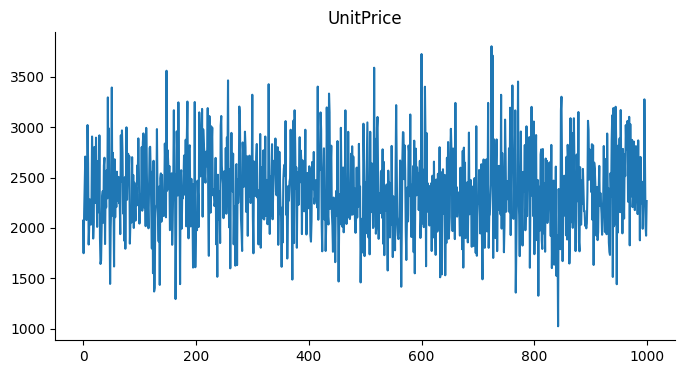

In [41]:
from matplotlib import pyplot as plt
group_sku['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

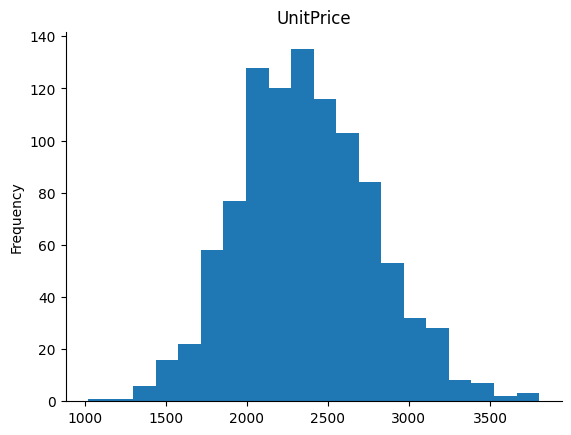

In [40]:
from matplotlib import pyplot as plt
group_sku['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
#5
group_date = df_svod.groupby('InvoiceDate')['UnitPrice'].sum().reset_index()
group_date

,InvoiceDate,UnitPrice
0,2020-01-01,1215.87
1,2020-01-02,1185.80
2,2020-01-03,1083.56
3,2020-01-04,1120.17
4,2020-01-05,1046.13
...,...,...
2070,2025-09-01,1098.59
2071,2025-09-02,960.25
2072,2025-09-03,857.66
2073,2025-09-04,1256.38


from matplotlib import pyplot as plt
group_date['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['InvoiceDate']
  ys = series['UnitPrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_date.sort_values('InvoiceDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('UnitPrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['InvoiceDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'InvoiceDate'}, axis=1)
              .sort_values('InvoiceDate', ascending=True))
  xs = counted['InvoiceDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = group_date.sort_values('InvoiceDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('InvoiceDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
group_date['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

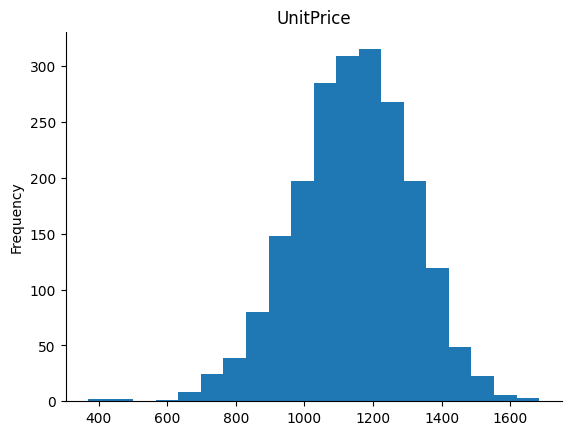

In [42]:
from matplotlib import pyplot as plt
group_date['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)


1. Создать дашборд с этими таблицами в дата ленс




